<a href="https://colab.research.google.com/github/Pawlik-Lukasz/Flight_model/blob/main/Flight_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# My dataset contains information about air travel. It includes data such as travel satisfaction, travel type, and distance between airports. The model I created evaluates traveler satisfaction based on age, business/economy class, flight type (business/leisure), and overall satisfaction rating. The model achieved an accuracy score of 0.688 and a precision score of 0.7, which is not the highest result but also not bad.


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score, auc

# creating DataFrame
df = pd.read_csv("Invistico_Airline.csv")

# Replacing satisfied with 1 and unsatisfied with 0
df.replace("satisfied", 1, inplace=True)
df.replace("dissatisfied", 0, inplace=True)

# Replacing Male with 0 and Female with 1
df.replace("Male", 0, inplace=True)
df.replace("Female", 1, inplace=True)

# Replacing Disloyal Customer with 0 and Loyal Customer with 1
df.replace("disloyal Customer", 0, inplace=True)
df.replace("Loyal Customer", 1, inplace=True)

# Replacing Personal Travel with 0 and Business Travel with 1
df.replace("Personal Travel", 0, inplace=True)
df.replace("Business travel", 1, inplace=True)

# Replacing Eco with 0, Eco Plus with 1, Business with 2
df.replace("Eco", 0, inplace=True)
df.replace("Eco Plus", 1, inplace=True)
df.replace("Business", 2, inplace=True)

# Renaming column labels to be consistend
df = df.rename(columns={"satisfaction":"Satisfaction", "Seat comfort":"Seat Comfort",
                   "Departure/Arrival time convenient": "Departure/Arrival Time Convenient",
                   "Food and drink":"Food and Drink", "Gate location":"Gate Location",
                   "Inflight wifi service":"Inflight Wifi Service", "Inflight entertainment":
                   "Inflight Entertainment", "Online support":"Online Support",
                   "Ease of Online booking":"Ease of Online Booking", "On-board service":
                   "On-board Service", "Leg room service": "Leg Room Service", "Baggage handling":
                   "Baggage Handling", "Checkin service":"Checkin Service", "Online boarding":"Online Boarding"})

df


,Satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat Comfort,Departure/Arrival Time Convenient,Food and Drink,...,Online Support,Ease of Online Booking,On-board Service,Leg Room Service,Baggage Handling,Checkin Service,Cleanliness,Online Boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,1,1,65,0,0,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,1,0,1,47,0,2,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,1,1,1,15,0,0,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,1,1,1,60,0,0,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,1,1,1,70,0,0,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,1,0,29,0,0,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,0,0,0,63,0,2,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,0,0,0,69,0,0,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,0,0,0,66,0,0,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


In [ ]:
# Calculating mean, variance and median
df.mean()
df.var()
df.median()

Satisfaction                            1.0
Gender                                  1.0
Customer Type                           1.0
Age                                    40.0
Type of Travel                          1.0
Class                                   1.0
Flight Distance                      1925.0
Seat Comfort                            3.0
Departure/Arrival Time Convenient       3.0
Food and Drink                          3.0
Gate Location                           3.0
Inflight Wifi Service                   3.0
Inflight Entertainment                  4.0
Online Support                          4.0
Ease of Online Booking                  4.0
On-board Service                        4.0
Leg Room Service                        4.0
Baggage Handling                        4.0
Checkin Service                         3.0
Cleanliness                             4.0
Online Boarding                         4.0
Departure Delay in Minutes              0.0
Arrival Delay in Minutes        

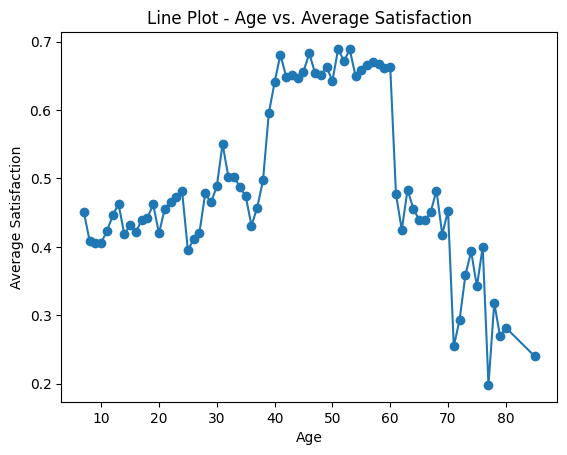

In [ ]:
# grouping data by age, calculating mean of satisfaction for every age. reset
# index to have numbers instead of "Age" on x axis
satisfaction_age_data = df.groupby('Age')['Satisfaction'].mean().reset_index()

# making plot with Age as x values and mean of satisfaction for each age group as y values
plt.plot(satisfaction_age_data['Age'], satisfaction_age_data['Satisfaction'], marker='o', linestyle='-')
plt.title('Line Plot - Age vs. Average Satisfaction')
plt.xlabel('Age')
plt.ylabel('Average Satisfaction')
plt.show()


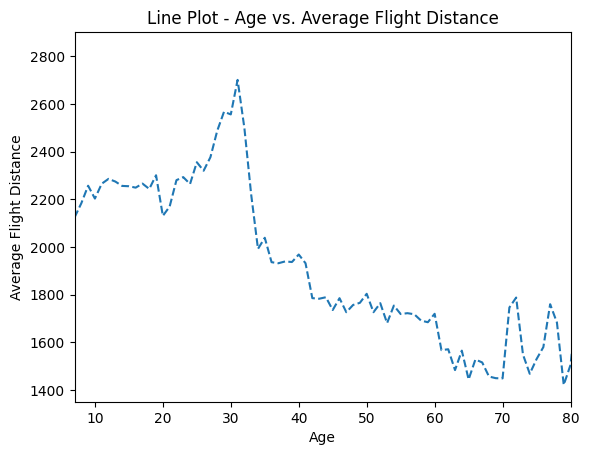

In [ ]:
# grouping data by age, calculating mean of Flight Distance for every age. reset
# index to have numbers instead of "Age" on x axis
satisfaction_flight_distance_data = df.groupby('Age')['Flight Distance'].mean().reset_index()
# Cut off plot to show only relevant data
plt.xlim(left=7, right=80)

# Drawing a plot
plt.plot(satisfaction_flight_distance_data['Age'], satisfaction_flight_distance_data['Flight Distance'], linestyle='--')
plt.title('Line Plot - Age vs. Average Flight Distance')
plt.xlabel('Age')
plt.ylabel('Average Flight Distance')
plt.show()

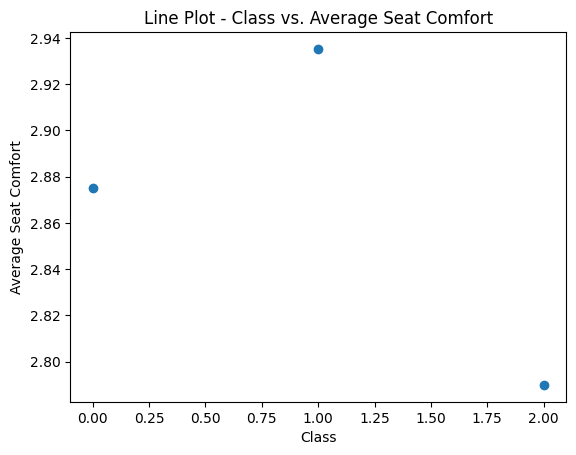

In [ ]:
# grouping data by Class, calculating mean of Seat Comfort for every Class. reset
# index to have numbers instead of "Class" on x axis
satisfaction_age_data = df.groupby('Class')['Seat Comfort'].mean().reset_index()
plt.scatter(satisfaction_age_data['Class'], satisfaction_age_data['Seat Comfort'], marker="o")
plt.title('Line Plot - Class vs. Average Seat Comfort')
plt.xlabel('Class')
plt.ylabel('Average Seat Comfort')
plt.show()

In [ ]:
# Making first logistic regression with two variables as X
X = df[['Age', 'Class']].values
y = df['Satisfaction'].values
model = LogisticRegression()
model.fit(X, y)
print(model.coef_, model.intercept_)
print(model.score(X, y))

[[0.01106494 0.63953311]] [-0.88615656]
0.6443178318447798


In [ ]:
# Making a model with Gender with only first 10 rows of dataframe
subset = df.head(10)
X_less = subset[['Age', 'Class', "Type of Travel", "Seat Comfort"]].values
y_less = subset['Gender'].values
model_less = LogisticRegression()
model_less.fit(X_less, y_less)
print(model_less.coef_, model_less.intercept_)
print(model_less.score(X_less, y_less))



[[ 0.08325965 -0.49750119  0.          0.        ]] [-2.76711319]
0.8


,Satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat Comfort,Departure/Arrival Time Convenient,Food and Drink,...,Online Support,Ease of Online Booking,On-board Service,Leg Room Service,Baggage Handling,Checkin Service,Cleanliness,Online Boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,1,1,65,0,0,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,1,0,1,47,0,2,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,1,1,1,15,0,0,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,1,1,1,60,0,0,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,1,1,1,70,0,0,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
5,1,0,1,30,0,0,1894,0,0,0,...,2,2,5,4,5,5,4,2,0,0.0
6,1,1,1,66,0,0,227,0,0,0,...,5,5,5,0,5,5,5,3,17,15.0
7,1,0,1,10,0,0,1812,0,0,0,...,2,2,3,3,4,5,4,2,0,0.0
8,1,1,1,56,0,2,73,0,0,0,...,5,4,4,0,1,5,4,4,0,0.0
9,1,0,1,22,0,0,1556,0,0,0,...,2,2,2,4,5,3,4,2,30,26.0


In [ ]:
# Making second logistic regression with 4 variables as X, we can see that it's
# predicting better than the first one
X_more = df[['Age', 'Class', "Type of Travel", "Seat Comfort"]].values
y_more = df['Satisfaction'].values

# Making KFold
scores = []
kf = KFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(X_more):
  X_train, X_test = X_more[train_index], X_more[test_index]
  y_train, y_test = y_more[train_index], y_more[test_index]
  model = LogisticRegression()
  model.fit(X_train, y_train)
  scores.append(model.score(X_test, y_test))

print(np.mean(scores))
model_more = LogisticRegression()
model_more.fit(X_more, y_more)
print(model_more.coef_, model_more.intercept_)
print(model_more.score(X_more, y_more))

# Calculating accuracy, precision, recall, f1 score and confusion matrix
y_pred = model_more.predict(X_more)
print("accuracy:", accuracy_score(y_more, y_pred))
print("precision:", precision_score(y_more, y_pred))
print("recall:", recall_score(y_more, y_pred))
print("f1 score:", f1_score(y_more, y_pred))
print(confusion_matrix(y_more, y_pred))
# So we can see that there was 23460 FP records, meaning model was predicting True
# values, but it was False value in reality. There was 17033  FN record, meaning model
# was predicting False values, but it was True value in reality

X_train, X_test, y_train, y_test = train_test_split(X_more, y_more)


0.6882891900215584
[[ 0.01101916  0.81772243 -0.38997491  0.4283067 ]] [-1.99856489]
0.6882275947028026
accuracy: 0.6882275947028026
precision: 0.6973449957427046
recall: 0.7603921954787796
f1 score: 0.7275051984845324
[[35333 23460]
 [17033 54054]]


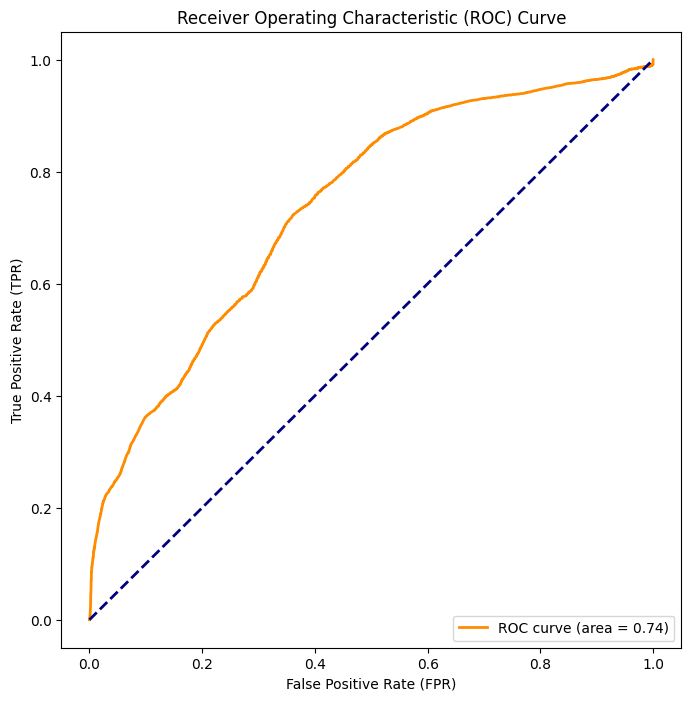

In [ ]:
# Predicting probabilities on the test set
y_probs = model_more.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
